In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv('Data1.csv')

# Separate features and target
X = data.drop(columns=['Rated_(T/F)', 'Winner', 'Game_Status'])  # Drop Rated_ as target, and others as they are not features
y = data['Rated_(T/F)']

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction (optional, can be skipped if you don't need PCA)
pca = PCA(n_components=5)  # Adjust based on your data
X_pca = pca.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM (Linear)": SVC(kernel='linear', probability=True)
}

# Evaluate each model using the test data
for model_name, model in models.items():
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))


Model: Decision Tree
              precision    recall  f1-score   support

       right       0.84      0.83      0.83      1431
       wrong       0.26      0.27      0.26       314

    accuracy                           0.73      1745
   macro avg       0.55      0.55      0.55      1745
weighted avg       0.73      0.73      0.73      1745

Model: Logistic Regression
              precision    recall  f1-score   support

       right       0.82      1.00      0.90      1431
       wrong       0.33      0.01      0.01       314

    accuracy                           0.82      1745
   macro avg       0.58      0.50      0.46      1745
weighted avg       0.73      0.82      0.74      1745

Model: Naive Bayes
              precision    recall  f1-score   support

       right       0.83      0.98      0.90      1431
       wrong       0.45      0.08      0.14       314

    accuracy                           0.82      1745
   macro avg       0.64      0.53      0.52      1745
weighte

c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

### Before *Hyper-Tuning*
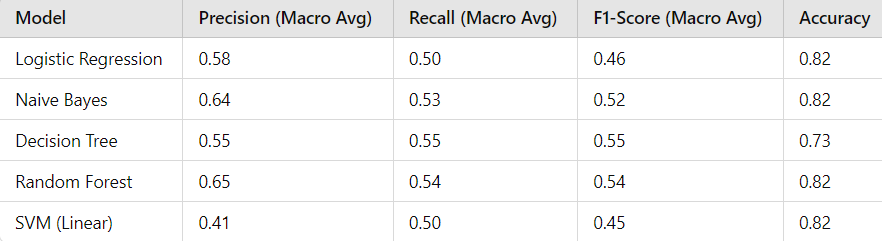

In [4]:
# from sklearn.model_selection import RandomizedSearchCV

# # Define models and their hyperparameter grids
# models = {
#     "Decision Tree": {
#         "model": DecisionTreeClassifier(),
#         "params": {
#             "max_depth": [3, 5, 10, None],
#             "min_samples_split": [2, 5, 10],
#             "criterion": ["gini", "entropy"]
#         }
#     },
#     "Logistic Regression": {
#         "model": LogisticRegression(),
#         "params": {
#             "penalty": ["l1", "l2", "elasticnet", None],
#             "C": [0.1, 1, 10],
#             "solver": ["lbfgs", "liblinear", "saga"]
#         }
#     },
#     "Naive Bayes": {
#         "model": GaussianNB(),
#         "params": {
#             "var_smoothing": [1e-9, 1e-8, 1e-7]
#         }
#     },
#     "Random Forest": {
#         "model": RandomForestClassifier(),
#         "params": {
#             "n_estimators": [50, 100, 200],
#             "max_depth": [None, 10, 20],
#             "min_samples_split": [2, 5, 10]
#         }
#     },
#     "SVM (Linear)": {
#         "model": SVC(kernel='linear', probability=True),
#         "params": {
#             "C": [0.1, 1, 10],
#         }
#     }
# }

# # Dictionary to store results
# best_models = {}

# # Perform randomized search for each model
# for model_name, model_data in models.items():
#     print(f"Tuning {model_name}...")
#     # Use RandomizedSearchCV here
#     random_search = RandomizedSearchCV(estimator=model_data["model"], 
#                                        param_distributions=model_data["params"], 
#                                        n_iter=50,  # Number of parameter combinations to try
#                                        cv=5, 
#                                        scoring="accuracy", 
#                                        n_jobs=-1, 
#                                        random_state=42)
#     random_search.fit(X_train, y_train)  # Replace X_train, y_train with your data
#     best_models[model_name] = random_search.best_estimator_
#     print(f"Best parameters for {model_name}: {random_search.best_params_}")
#     print(f"Best score for {model_name}: {random_search.best_score_}\n")

# # Access the best models
# print(best_models)


Tuning Decision Tree...


c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Decision Tree: {'min_samples_split': 2, 'max_depth': 5, 'criterion': 'gini'}
Best score for Decision Tree: 0.8233026260385536

Tuning Logistic Regression...


c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score


Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Best score for Logistic Regression: 0.821152088404145

Tuning Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best score for Naive Bayes: 0.8182861426913558

Tuning Random Forest...
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': None}
Best score for Random Forest: 0.8281740970104036

Tuning SVM (Linear)...


c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 